# Parkinson's Disease

## Detecting Parkinson's disease using data science

In [432]:
# Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
%matplotlib inline

In [433]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [434]:
import csv, sqlite3
import requests
import datetime

In [435]:
# print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# print all of the data in a feature
pd.set_option('display.max_colwidth', None)

## Data Inspection

In [437]:
df = pd.read_csv('Parkinsson disease.csv')

In [438]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [439]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [440]:
#calculate missing values
df.isnull().sum()/len(df)*100

name                0.0
MDVP:Fo(Hz)         0.0
MDVP:Fhi(Hz)        0.0
MDVP:Flo(Hz)        0.0
MDVP:Jitter(%)      0.0
MDVP:Jitter(Abs)    0.0
MDVP:RAP            0.0
MDVP:PPQ            0.0
Jitter:DDP          0.0
MDVP:Shimmer        0.0
MDVP:Shimmer(dB)    0.0
Shimmer:APQ3        0.0
Shimmer:APQ5        0.0
MDVP:APQ            0.0
Shimmer:DDA         0.0
NHR                 0.0
HNR                 0.0
status              0.0
RPDE                0.0
DFA                 0.0
spread1             0.0
spread2             0.0
D2                  0.0
PPE                 0.0
dtype: float64

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#### Normalizing the column 'spread1' since it has negative values and therefore affects the data prediction

In [443]:
df["spread1_normalised"] = np.interp(x=df["spread1"],
                                    xp=(df["spread1"].min(), df["spread1"].max()),
                                    fp=(0, 1))

In [444]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,spread1_normalised
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,0.569875
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,0.703277
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,0.636745
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0.695627
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,0.762472


In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                195 non-null    object 
 1   MDVP:Fo(Hz)         195 non-null    float64
 2   MDVP:Fhi(Hz)        195 non-null    float64
 3   MDVP:Flo(Hz)        195 non-null    float64
 4   MDVP:Jitter(%)      195 non-null    float64
 5   MDVP:Jitter(Abs)    195 non-null    float64
 6   MDVP:RAP            195 non-null    float64
 7   MDVP:PPQ            195 non-null    float64
 8   Jitter:DDP          195 non-null    float64
 9   MDVP:Shimmer        195 non-null    float64
 10  MDVP:Shimmer(dB)    195 non-null    float64
 11  Shimmer:APQ3        195 non-null    float64
 12  Shimmer:APQ5        195 non-null    float64
 13  MDVP:APQ            195 non-null    float64
 14  Shimmer:DDA         195 non-null    float64
 15  NHR                 195 non-null    float64
 16  HNR     

In [793]:
# create feature columns
x_feature = df.iloc[:, [1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,21,22,23,24]]

# create target columns
y_target = df.iloc[:,17:18]


In [795]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select
x_feature_new=SelectKBest(score_func=chi2,k=8).fit_transform(x_feature,y_target)

In [797]:
print(x_feature_new[:5])

[[119.992      157.302       74.997        0.426       21.033
    2.301442     0.284654     0.56987521]
 [122.4        148.65       113.819        0.626       19.085
    2.486855     0.368674     0.70327699]
 [116.682      131.111      111.555        0.482       20.651
    2.342259     0.332634     0.6367447 ]
 [116.676      137.871      111.366        0.517       20.644
    2.405554     0.368975     0.6956275 ]
 [116.014      141.781      110.655        0.584       19.649
    2.33218      0.410335     0.76247204]]


In [799]:
#converting the normalized array into a dataframe
df1 = pd.DataFrame(x_feature_new)

In [801]:
df1.head()

,0,1,2,3,4,5,6,7
0,119.992,157.302,74.997,0.426,21.033,2.301442,0.284654,0.569875
1,122.400,148.650,113.819,0.626,19.085,2.486855,0.368674,0.703277
2,116.682,131.111,111.555,0.482,20.651,2.342259,0.332634,0.636745
3,116.676,137.871,111.366,0.517,20.644,2.405554,0.368975,0.695627
4,116.014,141.781,110.655,0.584,19.649,2.332180,0.410335,0.762472


In [803]:
#renaming the columns according to their assigned values
df1.columns = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Shimmer(dB)','HNR','D2','PPE','spread1_Normalized']

In [805]:
#adding the target 'status' into the dataframe df1
df1 = pd.concat([df1,df['status']],axis=1)

In [807]:
df1.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Shimmer(dB),HNR,D2,PPE,spread1_Normalized,status
0,119.992,157.302,74.997,0.426,21.033,2.301442,0.284654,0.569875,1
1,122.400,148.650,113.819,0.626,19.085,2.486855,0.368674,0.703277,1
2,116.682,131.111,111.555,0.482,20.651,2.342259,0.332634,0.636745,1
3,116.676,137.871,111.366,0.517,20.644,2.405554,0.368975,0.695627,1
4,116.014,141.781,110.655,0.584,19.649,2.332180,0.410335,0.762472,1


In [809]:
#converting dataframe into a numpy array 
Y = df1['status'].to_numpy()

In [810]:
#transform and fit the data
transform = preprocessing.StandardScaler()
X = transform.fit_transform(df1)
X

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.86888575,
         0.80132308,  0.57142857],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.80360503,
         1.47985265,  0.57142857],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.40266141,
         1.14144541,  0.57142857],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.83241014,
        -1.01415428, -1.75      ],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.92610456,
        -0.97496019, -1.75      ],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.64505466,
        -0.03647134, -1.75      ]])

In [811]:
#split data into training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [812]:
Y_test.shape

(49,)

## Logistic Regresssion

In [814]:
#add parameters for all classification methods
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [815]:
#create a logistic regression then create a GridSearchCV with cv = 10
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr,parameters,cv = 10)
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [816]:
#display best hyperparameters and accuracy
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 1.0


In [817]:
#calculate the accuracy score
print('LogReg accuracy test: ', logreg_cv.score(X_test,Y_test))

LogReg accuracy test:  1.0


In [818]:
#create a confusion matrix table
yhat=logreg_cv.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test,yhat)

In [819]:
#convert confusion matrix table into a grid
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

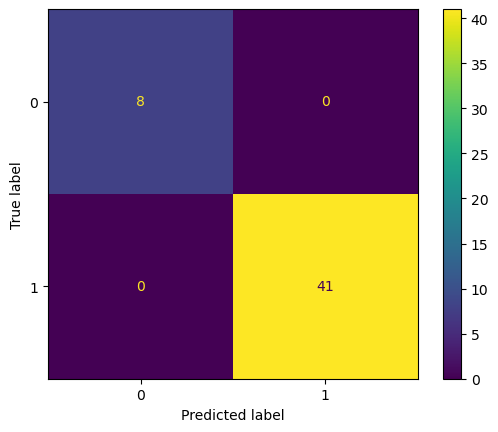

In [820]:
#show the grid
cm_display.plot()
plt.show()

## SVM

In [822]:
#create parameters
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [823]:
#create a grid search
svm_cv = GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [824]:
#print the best parameters and accuracy score
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 31.622776601683793, 'kernel': 'poly'}
accuracy : 1.0


In [825]:
print('SVM accuracy test: ', svm_cv.score(X_test,Y_test))

SVM accuracy test:  1.0


In [826]:
#create a confusion matrix table
yhat=svm_cv.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test,yhat)

In [827]:
#convert confusion matrix table into a grid
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

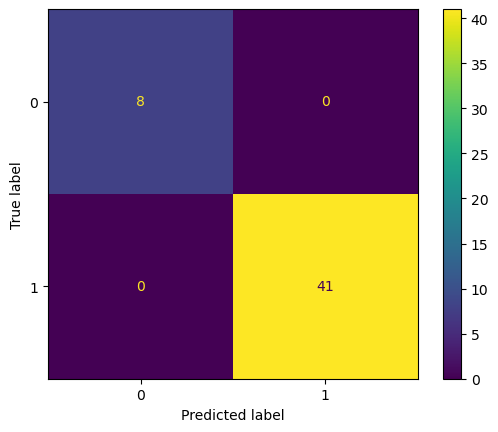

In [828]:
#show the grid
cm_display.plot()
plt.show()

## Decision Tree

In [868]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [869]:
tree_cv = GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_train,Y_train)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [870]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 1.0


In [871]:
#create a confusion matrix table
yhat=tree_cv.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test,yhat)

In [872]:
#convert confusion matrix table into a grid
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

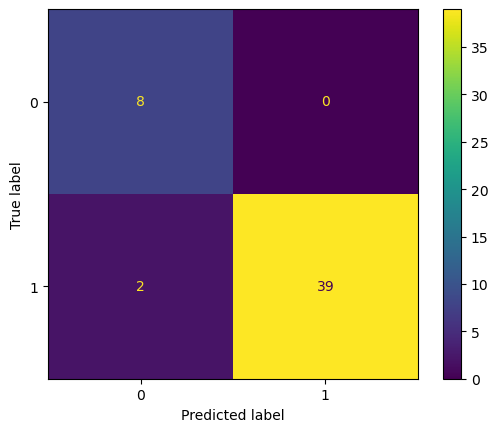

In [873]:
#show the grid
cm_display.plot()
plt.show()

## K Nearest Neighbors

In [882]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [884]:
knn_cv = GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [886]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy : 1.0


In [888]:
print('KNN accuracy test: ', knn_cv.score(X_test,Y_test))

KNN accuracy test:  1.0


In [890]:
#create a confusion matrix table
yhat=knn_cv.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test,yhat)

In [892]:
#convert confusion matrix table into a grid
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

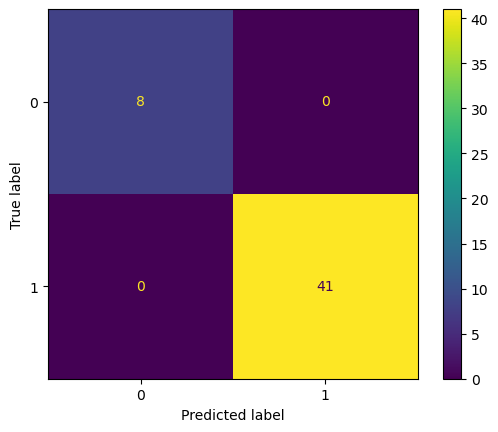

In [894]:
#show the grid
cm_display.plot()
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'SVM'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'KNN')])

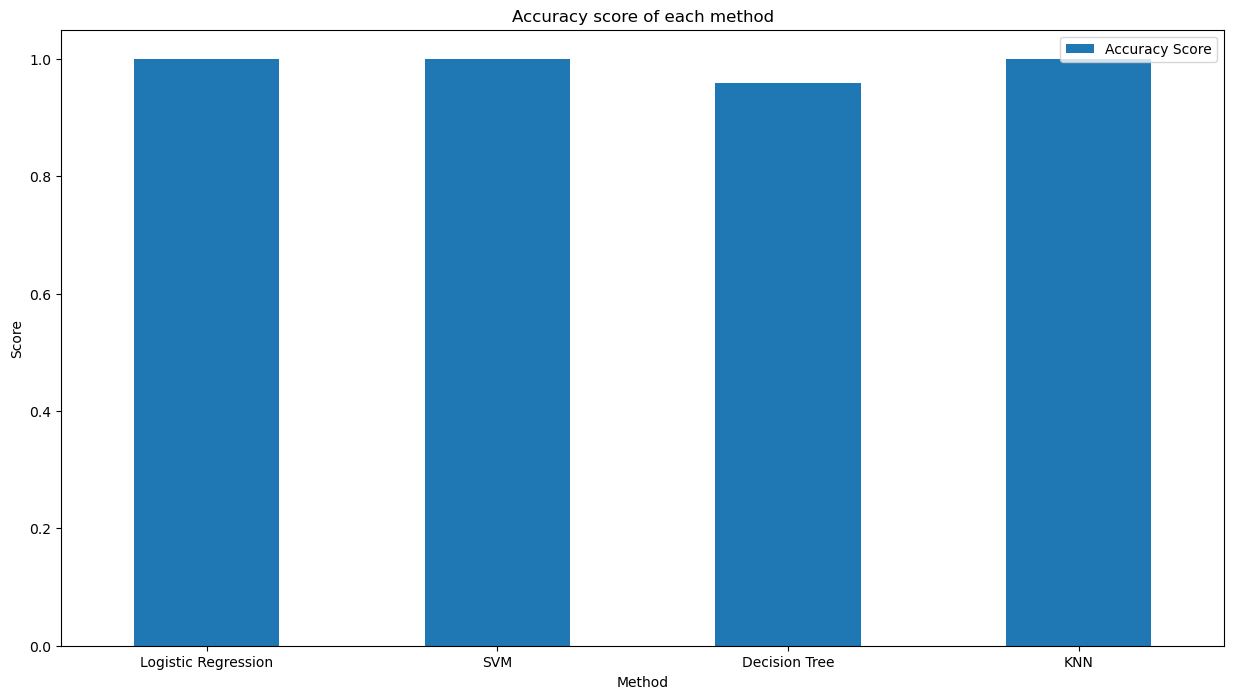

In [896]:
Report = pd.DataFrame({'Method':['Log_Reg','SVM','Decision Tree','KNN'],
                     'Accuracy Score': [logreg_cv.score(X_test,Y_test),svm_cv.score(X_test,Y_test),tree_cv.score(X_test,Y_test),knn_cv.score(X_test,Y_test)]},
                     index = ['Logistic Regression','SVM','Decision Tree','KNN'])

Report.plot(kind = 'bar', figsize=(15,8))
plt.title("Accuracy score of each method")
plt.xlabel("Method")
plt.ylabel("Score")
plt.xticks(rotation = 0)

### We can conclude that all methods lead to accurate results except Decision Tree. There may be issues related to feature selection or other things. I will have to check on it later